In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns
import tifffile as tiff



In [3]:
#Lecture du base de donnees
data=pd.read_csv('./right_data.csv')

In [3]:
#Les dimensions du base de donnees
data.shape

(5879, 2)

In [4]:
#Les columns,on a besoin seulemet de l'age et la reference de l'image
data.columns

Index(['Reference_PC', 'Age'], dtype='object')

In [6]:
#Les classes
classes = data['Age'].unique()
#on remarque que les classes varie de -1 a 13 ou -1 signifie que l'age de poisson est non connu
classes

array([ 5.,  4.,  3.,  8.,  7.,  6.,  2.,  9.,  1., -1.,  0., 10., 11.,
       12., 13.])

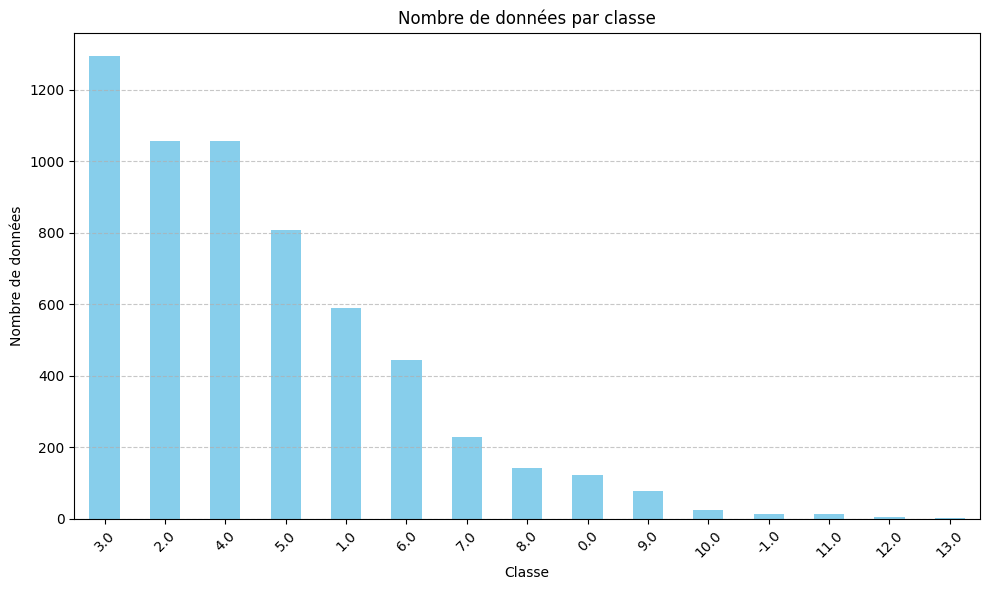

In [7]:
# Compter le nombre de données pour chaque classe
nombre_par_classe = data['Age'].value_counts()

# Visualisation de distrubtion des donnees par classe
plt.figure(figsize=(10, 6))  
nombre_par_classe.plot(kind='bar', color='skyblue')  
plt.title('Nombre de données par classe')  
plt.xlabel('Classe')  
plt.ylabel('Nombre de données')  
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()  

In [8]:
nombre_par_classe
#On remarque qu'il y'a une desquilbre dans la distribution des donnes sur les classes,ou la majorite des donnes sont d'age 2 ,3 et 4
#et ca peut nous causer overfiting
#14 donnees et non libele

Age
 3.0     1294
 2.0     1057
 4.0     1056
 5.0      807
 1.0      589
 6.0      444
 7.0      229
 8.0      142
 0.0      122
 9.0       77
 10.0      26
-1.0       14
 11.0      13
 12.0       5
 13.0       4
Name: count, dtype: int64

In [14]:
#les dimensions des images
dossier='./right/'
shapes=[]
for e in data[data['Age']>9]['Reference_PC']:
    file=dossier+e+'.tif'
    
    img = tiff.imread(file)
    shape=img.shape
    size=(shape[1],shape[2])
    if size not in shapes:
        shapes.append(size)
    print(e)
    img=None


print(shapes)

GBD_18_B42_C1_O_0101
GBD_18_B53_C1_O_0036
GBD_18_B54_C1_O_0142
GBD_18_B54_C1_O_0177
GBD_18_B59_C1_O_0097
GBD_18_B59_C1_O_0102
GBD_19_B11_C1_O_0110
GBD_19_B11_C1_O_0127
GBD_19_B11_C1_O_0258
GBD_19_B11_C1_O_0287
GBD_19_B11_C1_O_0310
GBD_19_B11_C1_O_0318
GBD_19_B11_C1_O_0642
GBD_19_B22_C1_O_0001
GBD_19_B22_C1_O_0054
GBD_19_B27_C1_O_0041
GBD_19_B27_C1_O_0081
GBD_19_B27_C1_O_0088
GBD_19_B27_C1_O_0097
GBD_19_B27_C1_O_0101
GBD_19_B27_C1_O_0130
GBD_19_B40_C1_O_0142
GBD_19_B40_C1_O_0230
GBD_19_B40_C1_O_0268
GBD_19_B40_C1_O_0338
MS_15_B51_C1_O_0018
MS_15_B91_C1_O_0014
MS_15_B92_C1_O_0009
RE_12_b118_C1_O_0008
RE_12_b118_C1_O_0257
RE_12_b48_C1_O_0197
RE_12_b83_C1_O_0061
RE_12_b83_C1_O_0064
RE_18_PLEU-PLA_TRIM1_IBTS_0261
RE_18_PLEU-PLA_TRIM1_IBTS_0309
RE_18_PLEU-PLA_TRIM1_IBTS_0380
ST_19_B68_O_C1_0057
ST_19_B68_O_C1_0165
ST_19_B68_O_C1_0175
ST_19_B68_O_C1_0190
ST_19_B68_O_C1_0199
ST_19_B68_O_C1_0238
ST_19_B68_O_C1_0241
ST_19_B68_O_C1_0242
ST_19_B68_O_C1_0289
ST_19_B68_O_C1_0296
ST_19_B68_O_C1_0302


In [15]:
max(shapes)
#On remarque que les images ont des dimensions differentes
#On remarque que les poissons les plus agees ayant des otholites de grandes dimensions ce qui est normale,puis le nombre des anneaux et l'age sont proportionels
#Donc on doit prendre on consideration la differenceation des dimensions des images dans notre traitement
#Pour notre cas on va normaliser les images sur une dimension maxiamle pour qu'on predre pas des informations lors de l'entrainement du model 

(1715, 1015)

In [15]:
# Calculer les statistiques descriptives
statistiques = data['Age'].describe()
statistiques

count    5879.000000
mean        3.647049
std         1.997388
min        -1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        13.000000
Name: Age, dtype: float64

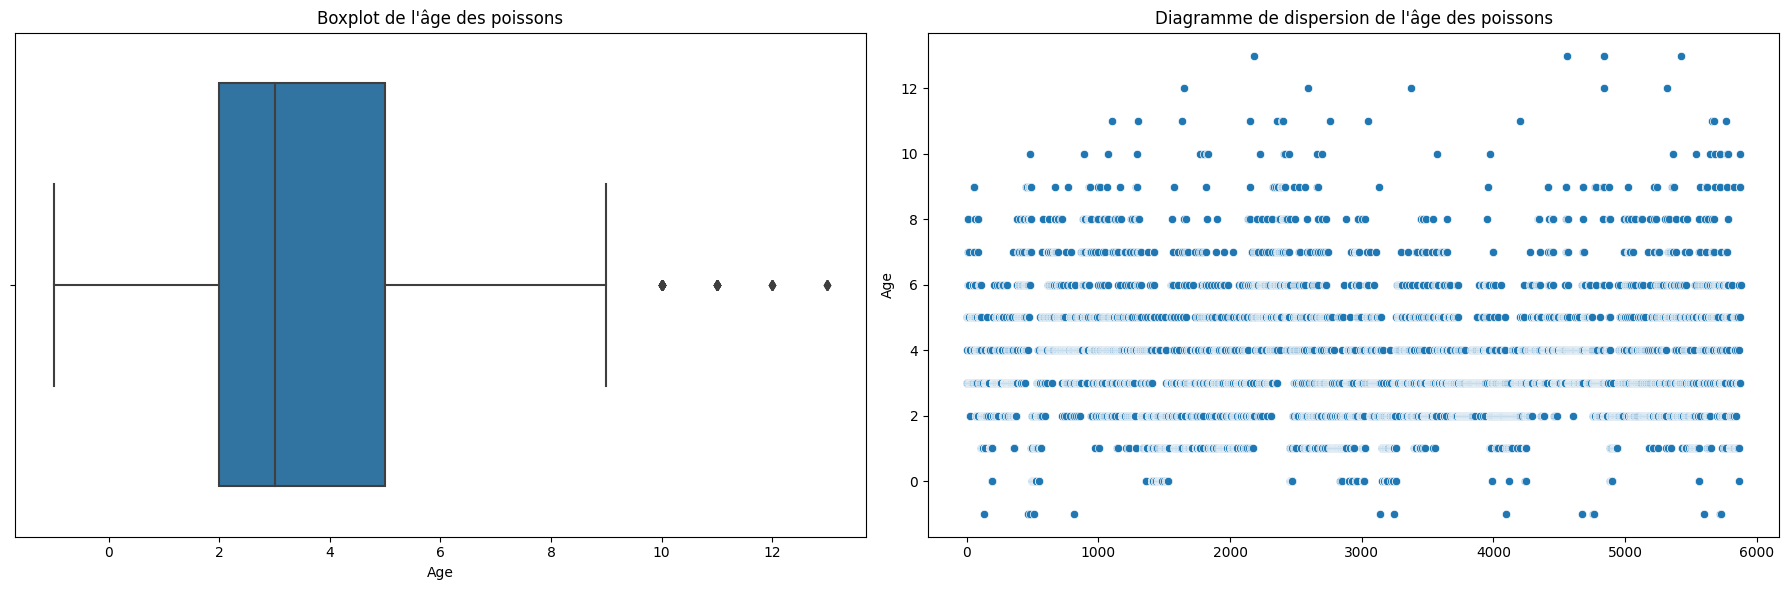

In [13]:
# Diagramme en boîte et moustaches
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.boxplot(x=data['Age'], ax=axes[0])
axes[0].set_title('Diagramme en boîte et moustaches de l\'âge des poissons')

# Diagramme de dispersion
sns.scatterplot(data=data['Age'], x=data.index, y=data['Age'], ax=axes[1])
axes[1].set_title('Diagramme de dispersion de l\'âge des poissons')

# Afficher les graphiques
plt.tight_layout()
plt.show()